<a href="https://colab.research.google.com/github/masonnystrom/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import scipy.stats as stats

In [0]:
vote_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], na_values="?")

In [0]:
vote_df = vote_df.replace({"y":1, "n": 0}).dropna(how='any')
# need to drop NaNs for confidence interval
vote_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
# reps and dems 
rep = vote_df[vote_df['party']=='republican']
dem = vote_df[vote_df['party']=='democrat']
print(rep.shape)
print(dem.shape)

(108, 17)
(124, 17)


In [0]:
# funciton for t-test on topics 
def ttest(df):
  for col in df_repub.columns:
    print(col,':', ttest_ind(df_democrat[col],df_repub[col], nan_policy='omit'))

###Generate and numerically represent a confidence interval

In [0]:
# funciton for Confidence interval 
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-dist and two tailed tests, default 95% confidence

  Args:
  sample - list or numpy array of sample observations
  confidence = level of confidence for the interval

  Returns
  tuple of mean(, lower and upper bound)
  """

  sample = np.array(sample)
  mean = np.nanmean(sample) 
  n = len(sample)
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return mean, mean - margin_of_error, mean + margin_of_error

In [232]:
confidence_interval(vote_df['budget'], confidence=0.95) 
# returns: mean, lower limit, upper limit
#we are 95% confident that the mean vote for the budget bill among senators
#is 53% and falls between between 46% and 59%. 

(0.5301724137931034, 0.46547286579616826, 0.5948719617900385)

In [0]:
# let's try for republicans
mean, lower_bound, upper_bound = confidence_interval(rep['budget'])
print("mean", mean)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)

mean 0.1574074074074074
lower bound: 0.08761355698812177
upper bound: 0.22720125782669304


# We have 95% confidence that republicans support for the budget bill has a mean of 15 with an interval of 8 to 22.

###Graphically (with a plot) represent the confidence interval

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

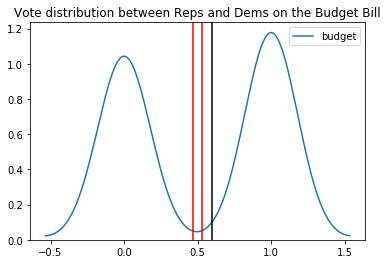

In [0]:
CI_graph = confidence_interval(vote_df['budget'])

sns.kdeplot(vote_df['budget'])
plt.title("Vote distribution between Reps and Dems on the Budget Bill")
plt.axvline(x=CI_graph[1], color='red')
plt.axvline(x=CI_graph[2], color='black')
plt.axvline(x=CI_graph[0], color='red')
plt.show()

###Interpret the confidence interval - what does it tell you about the data and its distribution?


####We have 95% confidence that the sample mean is around 53% and falls within the distribution of 46-59%. Therefore, depending on what we are saying the overall population refers to, we would expect to see a similar bill support in confidence intervals of other samples of this population. 

In [0]:
# another way to do confidence interval I found online using stats.t.interval

conf_int= stats.t.interval(0.95, # alpha (ie, confidence level)
                 vote_df.shape[0], # length of sample
                 loc = vote_df['budget'].mean(), # mean
                 scale = stats.sem(vote_df['budget']) # std error of the mean
                 )

print(conf_int)

(0.46547433439624464, 0.5948704931899622)


###Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [0]:
housing_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [0]:
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
cut_points = [0, 130000, 163000, 181000, 214000, 755000]
labels_names = ['0-130K', '130-163K','163-181k','181-214k', '214-755k']
housing_df['sale_price_category'] = pd.cut(housing_df['SalePrice'], cut_points, labels=labels_names)

housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sale_price_category
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,181-214k
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,181-214k
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,214-755k
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,130-163K
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,214-755k


In [0]:
housing_df['sale_price_category'].value_counts()

0-130K      376
214-755k    362
130-163K    356
181-214k    191
163-181k    175
Name: sale_price_category, dtype: int64

In [0]:
housing_df.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,sale_price_category
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6,5
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,0-130K
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198,376


In [0]:
housing_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [0]:
housing_df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [0]:
contingency_table = pd.crosstab(housing_df['BldgType'], housing_df['sale_price_category'], margins=True)
print(contingency_table.shape)
contingency_table

(6, 6)


sale_price_category,0-130K,130-163K,163-181k,181-214k,214-755k,All
BldgType,,,,,,
1Fam,297,282,144,161,336,1220
2fmCon,17,11,1,1,1,31
Duplex,22,24,2,4,0,52
Twnhs,21,9,9,3,1,43
TwnhsE,19,30,19,22,24,114
All,376,356,175,191,362,1460


In [0]:
row_sums = contingency_table.iloc[0:5, 5].values
col_sums = contingency_table.iloc[5, 0:5].values

print(row_sums)
print(col_sums)

[1220   31   52   43  114]
[376 356 175 191 362]


In [0]:
total_total = housing_df.shape[0]
# or total = contingency_table.loc['All', 'All']

In [0]:
# calculate expected
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(5, 5)
[[314.19178082 297.47945205 146.23287671 159.60273973 302.49315068]
 [  7.98356164   7.55890411   3.71575342   4.05547945   7.68630137]
 [ 13.39178082  12.67945205   6.23287671   6.80273973  12.89315068]
 [ 11.0739726   10.48493151   5.15410959   5.62534247  10.66164384]
 [ 29.35890411  27.79726027  13.66438356  14.91369863  28.26575342]]


In [0]:
# Observed
observed = pd.crosstab(housing_df['BldgType'], housing_df['sale_price_category']).values
print(observed.shape)
observed


(5, 5)


array([[297, 282, 144, 161, 336],
       [ 17,  11,   1,   1,   1],
       [ 22,  24,   2,   4,   0],
       [ 21,   9,   9,   3,   1],
       [ 19,  30,  19,  22,  24]])

In [0]:
chi_squared = ((observed-expected)**2 / (expected)).sum()
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 91.80159985971119


In [0]:
# using scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Square: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected: /n", np.array(expected))

Chi-Square: 91.80159985971119
P-value: 1.163630663071381e-12
Degrees of Freedom: 16
Expected: /n [[314.19178082 297.47945205 146.23287671 159.60273973 302.49315068]
 [  7.98356164   7.55890411   3.71575342   4.05547945   7.68630137]
 [ 13.39178082  12.67945205   6.23287671   6.80273973  12.89315068]
 [ 11.0739726   10.48493151   5.15410959   5.62534247  10.66164384]
 [ 29.35890411  27.79726027  13.66438356  14.91369863  28.26575342]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# funciton for plotting 
def plot_CI(sample, confidence=0.95):
  sns.kdeplot(sample)
  graph_interval = confidence_interval(sample, confidence)
  plt.axvline(x=graph_interval[1], color='red')
  plt.axvline(x=graph_interval[2], color='black')
  plt.axvline(x=graph_interval[0], color='red')
  plt.show();

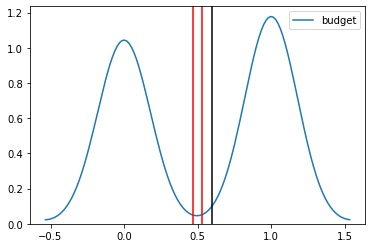

In [0]:
  plot_CI(vote_df['budget'], confidence=.95)

In [0]:
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()
# dai data link from coinmetrics https://coinmetrics.io/newdata/dai.csv but getting 403 error

Saving dai data.csv to dai data (1).csv


In [0]:
dai_df = pd.read_csv('dai data.csv')

In [234]:
print(dai_df.shape)
dai_df.head(10)

(96, 25)


,date,AdrActCnt,CapMrktCurUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2019-11-13,7,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
1,2019-11-14,0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
2,2019-11-15,2,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
3,2019-11-16,0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
4,2019-11-17,2,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
5,2019-11-18,1035,NaN,2.339159e+06,NaN,0.612873,NaN,NaN,NaN,NaN,NaN,1.480820e+06,979,1059,2.416195e+06,NaN,2595.144413,NaN,75.000000,NaN,2.748258e+06,NaN,NaN,NaN,NaN
6,2019-11-19,1724,NaN,1.000471e+07,NaN,0.103298,NaN,NaN,NaN,NaN,NaN,6.941473e+06,3466,4122,6.719873e+07,NaN,19550.109806,NaN,2741.209197,NaN,8.058555e+07,NaN,NaN,NaN,NaN
7,2019-11-20,1140,9.091745e+06,4.218250e+06,4.229720e+06,0.309905,NaN,0.000124,1.002719,NaN,NaN,9.067091e+06,2299,2764,2.925763e+07,2.933719e+07,16181.322476,16225.321019,2462.342176,2469.037517,4.472518e+07,4.484679e+07,NaN,NaN,NaN
8,2019-11-21,1309,1.268051e+07,6.856175e+06,6.872486e+06,0.173457,NaN,0.000132,1.002379,NaN,NaN,1.265041e+07,4069,5198,7.293118e+07,7.310469e+07,18174.547871,18217.785413,3103.443374,3110.826516,9.447130e+07,9.469605e+07,NaN,NaN,NaN
9,2019-11-22,1525,1.471043e+07,4.083060e+06,4.096330e+06,0.118091,NaN,0.000138,1.003250,NaN,NaN,1.466278e+07,7876,10221,1.241652e+08,1.245687e+08,15169.849160,15219.150363,3333.000000,3343.832073,1.550510e+08,1.555549e+08,NaN,NaN,NaN


In [0]:
dai_price = pd.DataFrame(dai_df, columns=['PriceUSD', 'PriceBTC', 'date','CapMrktCurUSD', 'TxTfrValMeanUSD'])

In [0]:
dai_price = dai_price.dropna(axis=0)

In [240]:
print(dai_price.shape)
dai_price.head()

(89, 5)


,PriceUSD,PriceBTC,date,CapMrktCurUSD,TxTfrValMeanUSD
7,1.002719,0.000124,2019-11-20,9.091745e+06,16225.321019
8,1.002379,0.000132,2019-11-21,1.268051e+07,18217.785413
9,1.003250,0.000138,2019-11-22,1.471043e+07,15219.150363
10,1.003466,0.000137,2019-11-23,1.500434e+07,19218.348646
11,1.001746,0.000144,2019-11-24,1.493769e+07,16293.511794


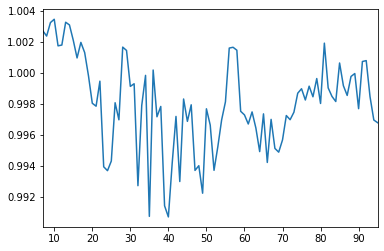

In [0]:
dai_price['PriceUSD'].plot();
# dai is a stablecoin that is supposed to stay at the unit of 1.0

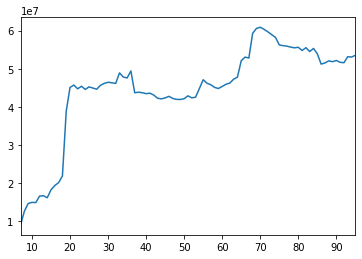

In [0]:
dai_price['CapMrktCurUSD'].plot();
#dai stablecoin market cap in usd

In [0]:
# how Ryan dropped NaNs in the Q&A lecture
# calculated confidence interval for every column in my dataset
#confidence_intervals = []

# for column in df:
#   col = df[column]
#   # Clean NaNs out of individual columns
#   col_cleaned = col[~np.isnan(df[column])]
#   confidence_intervals.append(mean_moe(col_cleaned))

# confidence_intervals

In [241]:
confidence_interval(dai_price['PriceUSD'])

(0.9980303835383156, 0.9973974244531156, 0.9986633426235156)

### This is cool
We can say that we have 95% confidence that the DAI stablecoin maintains a mean price of .99803 and falls between an interval of 0.9973 and 0.99866. This is important because like the U.S dollar a stablecoin is supposed to maintain the unit of 1 and now we can how well Dai has performed. 

In [0]:
plot_CI(dai_price['PriceUSD'])

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)